In [1]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)

from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid

import gym

env = gym.make("LunarLander-v2-mo-custom", render_mode="rgb_array", max_episode_steps=500)

In [2]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.988
epsilon_min = 0.05
batch_size = 128
hidden_size = 128
BAN_SIZE = 3
max_memory_size=10000
train_start = 128
use_clipping = True
clipping_tol = 1.0

agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=3, max_memory_size=max_memory_size, train_start=100, use_clipping=use_clipping, clipping_tol=clipping_tol)


c:\Python310\lib\site-packages\gym\utils\passive_env_checker.py:252: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


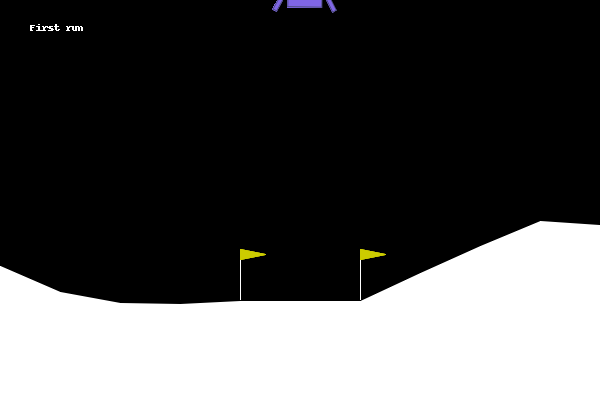

In [3]:
from IPython.display import Image as IpyImg

total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="First run", render=False, verbose=False)

display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

Using matplotlib backend: <object object at 0x000002436197F480>


c:\Python310\lib\site-packages\gym\utils\passive_env_checker.py:252: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


12:06:38	Episode	1	timesteps:	98	Took	1.4007 sec - reward:	[-465.9800655694273, -100.0, -9.089999999999996]	| 100AvgReward: [-465.9800655694273, -100.0, -9.089999999999996]
12:06:59	Episode	2	timesteps:	106	Took	20.753638 sec - reward:	[-144.86447686936927, -100.0, -8.909999999999998]	| 100AvgReward: [-305.4222712193983, -100.0, -8.999999999999996]
12:07:02	Episode	3	timesteps:	91	Took	2.508117 sec - reward:	[-517.5176117794474, -100.0, -9.09]	| 100AvgReward: [-376.12071807274805, -100.0, -9.029999999999998]
12:07:05	Episode	4	timesteps:	116	Took	3.470613 sec - reward:	[-228.46109768504076, -100.0, -9.779999999999992]	| 100AvgReward: [-339.20581297582123, -100.0, -9.217499999999996]
12:07:09	Episode	5	timesteps:	129	Took	3.781762 sec - reward:	[-96.19103786461909, -100.0, -11.609999999999994]	| 100AvgReward: [-290.60285795358084, -100.0, -9.695999999999994]
12:07:11	Episode	6	timesteps:	81	Took	2.256953 sec - reward:	[55.351429589772295, -100.0, -7.620000000000001]	| 100AvgReward: [-23

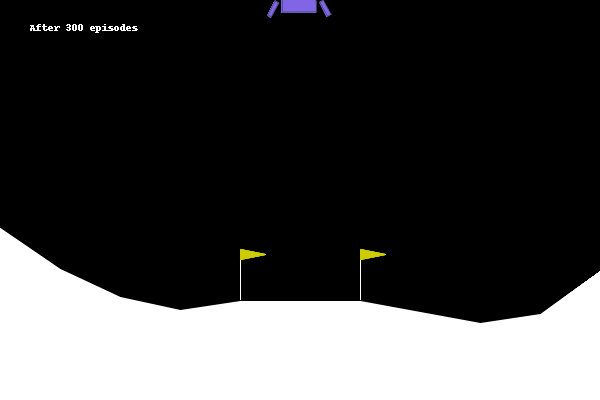

In [4]:
from IPython.display import Image as IpyImg

%matplotlib

HOW_MANY_ITERATIONS = 1
EPISODES_PER_ITERATION = 300
REPLAY_FREQUENCY=3
mname = "fooo.model"

total_rewards = []
total_avg_rewards   = []
total_timings = []


for i in range(HOW_MANY_ITERATIONS):
    rewards, avg_rewards, timings, infos_lists = agent.learning(env=env,episodes=EPISODES_PER_ITERATION, replay_frequency=REPLAY_FREQUENCY, mname=mname, verbose=True)
    total_rewards += rewards
    total_avg_rewards += avg_rewards
    total_timings += timings
    title=f"After {(i+1)*EPISODES_PER_ITERATION} episodes"
    total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title=title, render=False, verbose=False)
    display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

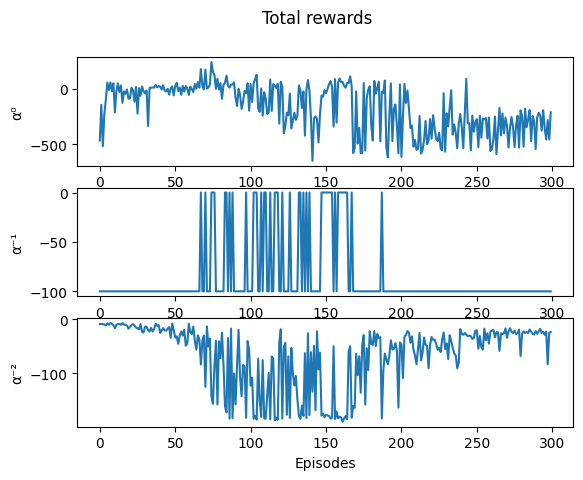

In [5]:
from LMORL.BAN.API.ban_utils import Ban

%matplotlib inline

r = Ban.display_plot(total_rewards, len(total_rewards), "Total rewards")

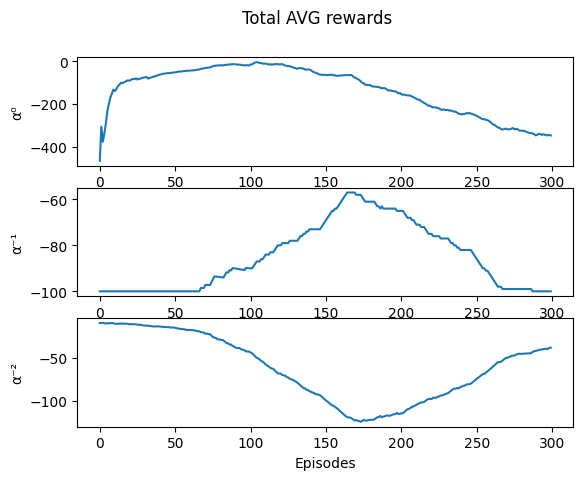

In [6]:
r = Ban.display_plot(total_avg_rewards, len(total_avg_rewards), "Total AVG rewards")

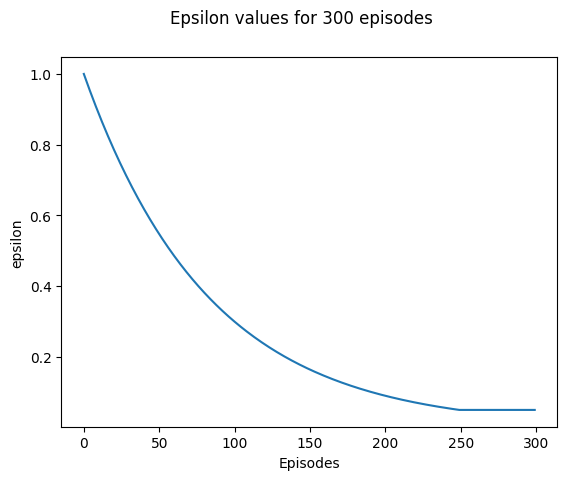

In [3]:
%matplotlib inline

r = agent.plot_epsilon_values(300)